# New York City Airbnb Analysis


# Importing Libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df= pd.read_csv('AB_NYC_2019.csv')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df['id'].nunique()

48895

In [11]:
df['host_id'].nunique()

37457

Here,id is unique column and host_id is not unique column.

In [12]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


There are records with “price” = 0 which is unrealistic as this means no need to pay to stay. 
So these records should be removed.

In [13]:
df[df['price']==0]['neighbourhood_group'].count()

11

In [14]:
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [15]:
df.drop(df[df['price'] == 0].index, inplace = True) 

In describe method maximum of 'minimum_nights'is 1250 which I believe is unrealistic (is this still an Airbnb or just another rental contract?).  

I put a threshold as 365 days. 
Any records with “minimum_nights” larger than 365 will also be removed.

In [16]:
 df[df['minimum_nights'] > 365].count()

id                                14
name                              13
host_id                           14
host_name                         14
neighbourhood_group               14
neighbourhood                     14
latitude                          14
longitude                         14
room_type                         14
price                             14
minimum_nights                    14
number_of_reviews                 14
last_review                        6
reviews_per_month                  6
calculated_host_listings_count    14
availability_365                  14
dtype: int64

In [17]:
df.drop(df[df['minimum_nights'] > 365].index,inplace = True)

In [18]:
df[df['minimum_nights'] > 365].count()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [35]:
df['neighbourhood_group'].value_counts()

Manhattan        21654
Brooklyn         20089
Queens            5664
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Segmentation of data for visualiztion of type of rooms¶


In [44]:
df_type_of_rooms=df['room_type'].value_counts()
df_type_of_rooms = pd.DataFrame({'Room Type': df_type_of_rooms.index,'Count': df_type_of_rooms.values})
df_type_of_rooms

,Room Type,Count
0,Entire home/apt,25398
1,Private room,22315
2,Shared room,1157


## Pie-Chart visualization of types of rooms¶


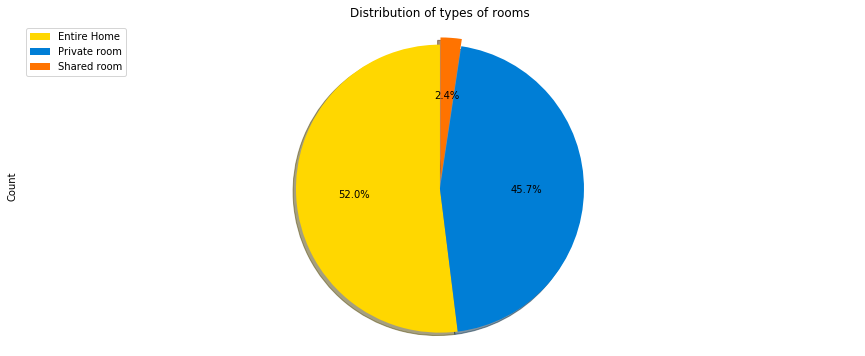

In [65]:
df_type_of_rooms['Count'].plot(kind='pie',
                               startangle=90,
                               shadow=True,
                               figsize=(15,6),
                               autopct="%1.1f%%",
                               labels=None,
                               explode=[0,0,0.05],
                               colors=['gold','#007ED6','#FF7300'])
plt.title('Distribution of types of rooms')
plt.axis('equal')
plt.legend(labels=['Entire Home','Private room','Shared room'],loc='upper left')

#### Conclusion: Most of the people offer either a entire home or a private room


In [69]:
df_neighbourhood_group_cnt = df['neighbourhood_group'].value_counts()
df_neighbourhood_group_cnt = pd.DataFrame({'Neighbourhood': df_neighbourhood_group_cnt.index,'Count': df_neighbourhood_group_cnt.values})
df_neighbourhood_group_cnt

,Neighbourhood,Count
0,Manhattan,21654
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1090
4,Staten Island,373


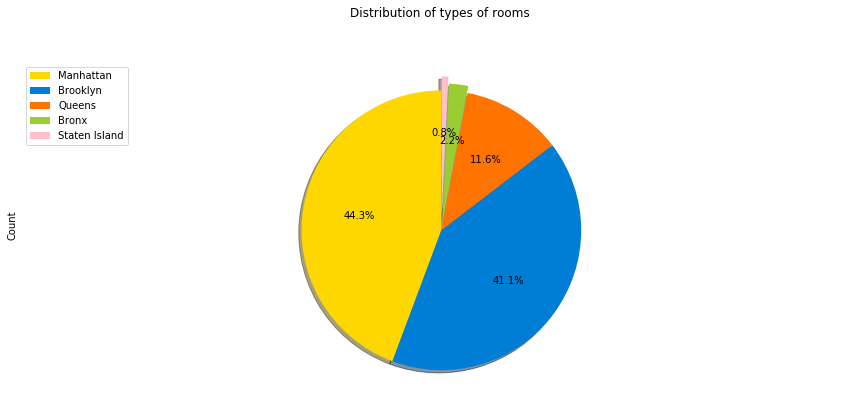

In [87]:
df_neighbourhood_group_cnt['Count'].plot(kind='pie',
                                         startangle=90,
                                        shadow=True,
                                        figsize=(15,6),
                                        autopct="%1.1f%%",
                                        labels=None,
                                        explode=[0,0,0,0.05,0.10],
                                        colors=['gold','#007ED6','#FF7300','yellowgreen','pink'])
plt.title('Distribution of types of rooms',y=1.12)
plt.axis('equal')
plt.legend(["Manhattan",'Brooklyn','Queens','Bronx','Staten Island'],loc="upper left")



#### Conclusion: More than half of the houses are based in either Manhatten or Brooklyn


Text(0, 0.5, 'Price')

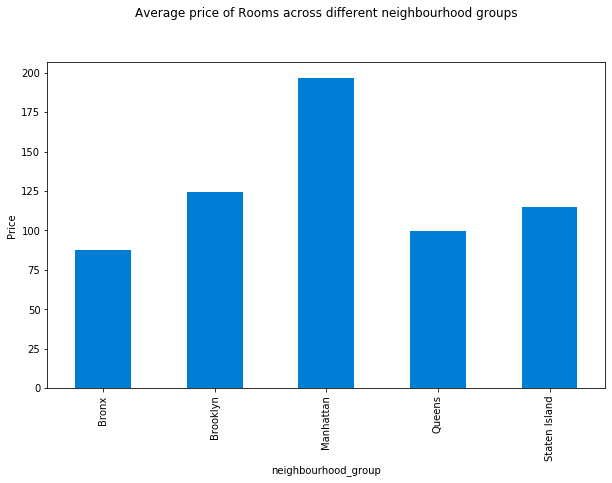

In [99]:
df.groupby('neighbourhood_group')['price'].mean().plot(kind='bar',figsize=(10,6),color='#007ED6')
plt.title('Average price of Rooms across different neighbourhood groups',y=1.12)
plt.ylabel("Price")


#### Conclusion: Manhattan has the highest average price of 180$


# Business Questions

1 how many hosts are in every neighbourhood_group? what are the top host ids who have the highest number of rooms in   every neighbourhood_group?

2 What are the features that affect on the price? can we predict the price from these features?

3 Which neighbourhood has the highest number of reviews, and the highest number of rooms for every neighbourhood       group? what can we learn from the results?

## Question 1

## 1 how many hosts are in every neighbourhood_group? what are the top host ids who have the highest number of rooms in  every neighbourhood_group?

In [24]:
#how many hosts are in every neighbourhood_group?
df.groupby('neighbourhood_group')['id'].count()


neighbourhood_group
Bronx             1090
Brooklyn         20089
Manhattan        21654
Queens            5664
Staten Island      373
Name: id, dtype: int64

In [54]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [80]:
pd.set_option('display.max_columns',None)

## what are the top host ids who have the highest number of rooms in every neighbourhood_group?

In [59]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')


In [61]:
df['neighbourhood_group'].cat.categories


Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object')

In [63]:
pd.crosstab(df['neighbourhood_group'],columns=df['room_type'])

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9556,10122,411
Manhattan,13193,7982,479
Queens,2094,3372,198
Staten Island,176,188,9


## 2 What are the features that affect on the price? can we predict the price from these features?


In [34]:
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,87.577064,106.725371,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20089.0,124.452238,186.922112,10.0,60.0,90.0,150.0,10000.0
Manhattan,21654.0,196.888011,291.421157,10.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.493997,167.125802,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


Most Airbnb houses are in either Manhattan or Brooklyn. 

However, these two regions are also the highest prices among the five regions.

A possible reason is that because the demands in these regions are high, 
causing more hosts to rent out their rooms or apartments.

In [33]:
df.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.356844,76.553547,50.773723
Manhattan,249.276359,116.776622,88.933194
Queens,147.031996,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In average, you can get a private room in Brooklyn but you can’t even afford a shared room in Manhattan.


In [114]:
for i in set(df['neighbourhood_group']):
    print(df.loc[df['neighbourhood_group']==i].groupby(['neighbourhood_group','neighbourhood']).agg({'price':['count','mean']}).sort_values(by=('price','mean'),ascending=False).head())
    print()    

                                   price            
                                   count        mean
neighbourhood_group neighbourhood                   
Bronx               Riverdale       11.0  442.090909
                    City Island     18.0  173.000000
                    Spuyten Duyvil   4.0  154.750000
                    Eastchester     13.0  141.692308
                    Unionport        7.0  137.142857

                                    price            
                                    count        mean
neighbourhood_group neighbourhood                    
Queens              Neponsit          3.0  274.666667
                    Breezy Point      3.0  213.333333
                    Jamaica Estates  19.0  182.947368
                    Arverne          77.0  171.779221
                    Belle Harbor      8.0  171.500000

                                      price            
                                      count        mean
neighbourhood_group neighbourh

 Here, the location and room_type feature is affected by price.

## 3 Which neighbourhood has the highest number of reviews, and the highest number of rooms for every neighbourhood group? what can we learn from the results?

### Which neighbourhood has the highest number of reviews, 

In [155]:
df.groupby('neighbourhood')['number_of_reviews'].agg('max').sort_values(ascending=False)

neighbourhood
Jamaica                       629
Harlem                        607
East Elmhurst                 543
Lower East Side               540
Park Slope                    488
                             ... 
West Farms                      4
Bay Terrace, Staten Island      2
Woodrow                         0
Fort Wadsworth                  0
New Dorp                        0
Name: number_of_reviews, Length: 221, dtype: int64

### the highest number of rooms for every neighbourhood group?

# 1st way:-

In [121]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')


In [122]:
df['neighbourhood_group'].cat.categories


Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object')

In [125]:
df['room_type']=df['room_type'].astype('category')

In [126]:
df['room_type'].cat.categories

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object')

In [26]:
#Number of each type of rooms in each Neighbourhood group¶ or the highest number of rooms for every neighbourhood group?
df_neighbourhood=pd.crosstab(df['neighbourhood_group'],columns=df['room_type'])
df_neighbourhood

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9556,10122,411
Manhattan,13193,7982,479
Queens,2094,3372,198
Staten Island,176,188,9


# 2nd way

# Or different way and easy way of doing above analysis:-

In [154]:
#Number of each type of rooms in each Neighbourhood group¶ or
# the highest number of rooms for every neighbourhood group?
df.groupby(['neighbourhood_group','room_type'])['id'].count().unstack()


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9556,10122,411
Manhattan,13193,7982,479
Queens,2094,3372,198
Staten Island,176,188,9


Text(0, 0.5, 'Price')

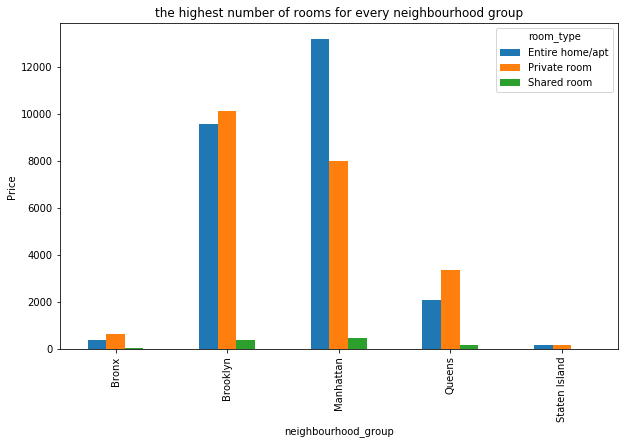

In [32]:
df_neighbourhood.plot(kind='bar',figsize=(10,6))
plt.title("the highest number of rooms for every neighbourhood group")
plt.ylabel("Price")

## Average price of each type of room in different neighbourhood group

In [148]:
df_neighbourhood2=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack(level=1)

df_neighbourhood2

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.356844,76.553547,50.773723
Manhattan,249.276359,116.776622,88.933194
Queens,147.031996,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'price')

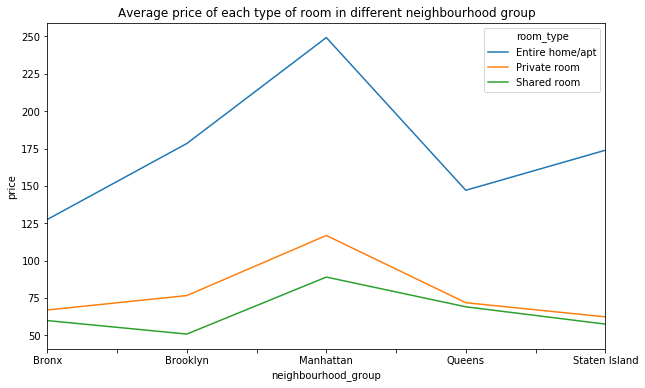

In [163]:
df_neighbourhood2.plot(kind='line',figsize=(10,6))
plt.title("Average price of each type of room in different neighbourhood group") 
plt.ylabel("price")


## Maximum price of each type of room across different neighbourhoods¶


In [30]:
df_neighbourhood3=df.groupby(['neighbourhood_group','room_type'])['price'].max().unstack()
df_neighbourhood3

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,1000,2500,800
Brooklyn,10000,7500,725
Manhattan,10000,9999,1000
Queens,2600,10000,1800
Staten Island,5000,300,150


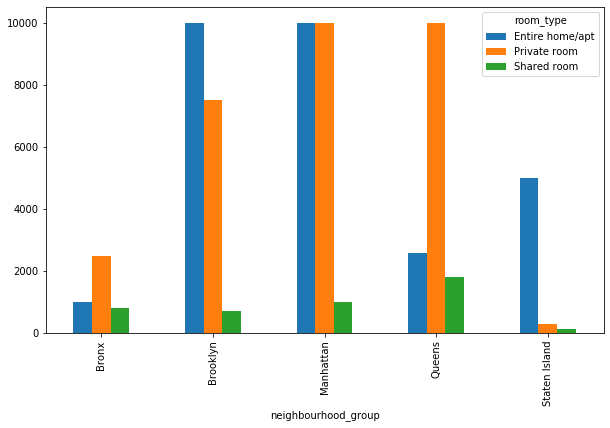

In [31]:
df_neighbourhood3.plot(kind='bar',figsize=(10,6))

## Is there any  relationship between price and number of reviews per month for each neighbourhood_group?

In [170]:
df.groupby('neighbourhood_group')[['price','reviews_per_month']].corr()

price  reviews_per_month
neighbourhood_group                                               
Bronx               price              1.000000          -0.009540
                    reviews_per_month -0.009540           1.000000
Brooklyn            price              1.000000          -0.015322
                    reviews_per_month -0.015322           1.000000
Manhattan           price              1.000000          -0.011292
                    reviews_per_month -0.011292           1.000000
Queens              price              1.000000          -0.039539
                    reviews_per_month -0.039539           1.000000
Staten Island       price              1.000000          -0.102423
                    reviews_per_month -0.102423           1.000000

Instead of using number_of_reviews, 
I would use reviews_per_month since this can eliminate the effect of duration listing on Airbnb.

Apparently from below data,there is no relationship between price and number of reviews per month.


In [85]:
df['latitude'].describe()

count    48870.000000
mean        40.728952
std          0.054534
min         40.499790
25%         40.690093
50%         40.723080
75%         40.763127
max         40.913060
Name: latitude, dtype: float64

In [29]:
df['longitude'].describe()

count    48870.000000
mean       -73.952172
std          0.046163
min        -74.244420
25%        -73.983080
50%        -73.955690
75%        -73.936280
max        -73.712990
Name: longitude, dtype: float64

In [89]:
import folium
import folium.plugins as plugins
m = folium.Map(location=[40.7,-74], zoom_start=10)
df_loc= df[['latitude','longitude']].values
df_loc =df_loc.tolist()
hm = plugins.HeatMap(df_loc)
hm.add_to(m)
m

There is a large red area in Manhattan and Brooklyn.